<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con titanic dataset

Ejemplo de clasificación utilizando el dataset de titanic<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('titanic.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv > titanic.csv
    else:
        !wget titanic.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv

--2023-09-03 13:38:41--  http://titanic.csv/
Resolving titanic.csv (titanic.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘titanic.csv’
--2023-09-03 13:38:41--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.006s  

2023-09-03 13:38:42 (9.23 MB/s) - ‘titanic.csv’ saved [61194/61194]

FINISHED --2023-09-03 13:38:42--
Total wall clock time: 0.4s
Downloaded: 1 files, 60K in 0.006s (9.23 MB/s)


### `titanic.csv`:
El dataset **`titanic.csv`** contiene datos sobre los pasajeros que estuvieron en el titanic y si finalmente sobrevivieron o nó al viaje.<br>
- **Passengerid** --> id del pasajero, ejemplo 5
- **Survived** --> sobrevivió? 1(Si), 0(No)
- **Pclass** --> clase (1, 2, 3)
- **Name** --> nombre
- **Sex** --> genero, ejemplo male(masculino), female(femenino)
- **Age** --> edad
- **Siblings** --> Hermanos y esposas/esposos abordo
- **Parch** --> Hijos abordo
- **Ticket** --> Nº de ticket
- **Fare** --> tarifa del ticket
- **Cabine** --> Nº de cabina
- **Embarked** --> Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv('titanic.csv')
des = df.describe()
des.loc['Nan'] = df.isna().sum()

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Alumno, del dataset original cree uno nuevo pero
# unicamente con las siguientes columnas:
# Survived, Pclass, Sex, Age, SibSp, Parch
df2 = df[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [6]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df2.dropna(subset=['Age'], inplace=True)

<ipython-input-6-126b46b2b227>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['Age'], inplace=True)


In [7]:
# Alumno: Fin de la limpieza, especifique cuantas filas se poseen para analizar
df2.shape[0]

714

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [8]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


<Axes: xlabel='Survived', ylabel='count'>

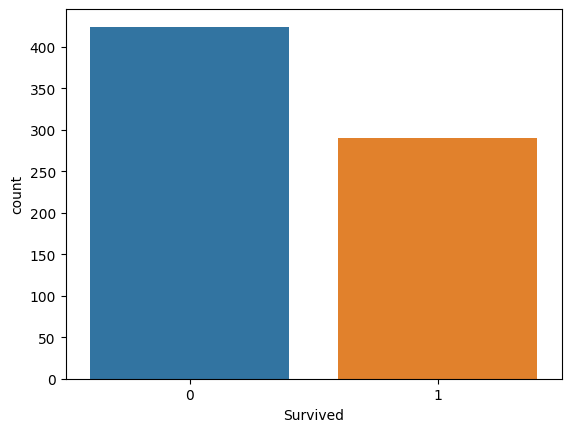

In [9]:
# Alumno: Explorar que tan balanceado está el dataset,
# determinar cuantas personas sobrivivieron o nó
fig = plt.Figure()
ax = fig.add_subplot()
sns.countplot(data=df2, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

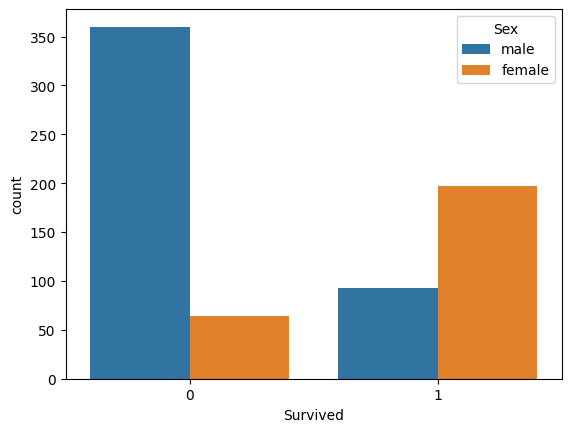

In [10]:
# Alumno: Determinar cuantas personas sobrevivieron
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data=df2, x='Survived', hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

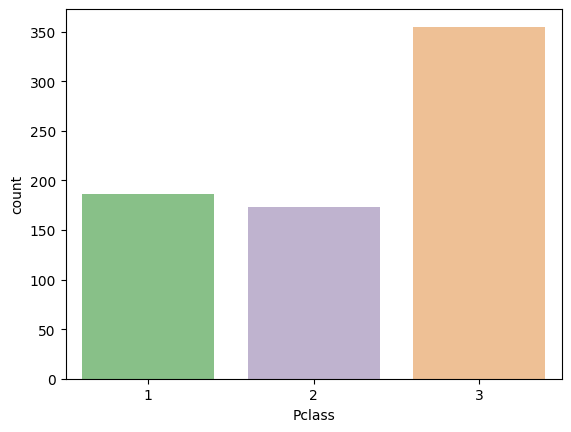

In [11]:
# Alumno: Determinar cuantas personas había de cada clase
# Utilice el gráfico de seaborn countplot
sns.countplot(data=df2, x='Pclass', palette='Accent')

<Axes: xlabel='Pclass', ylabel='count'>

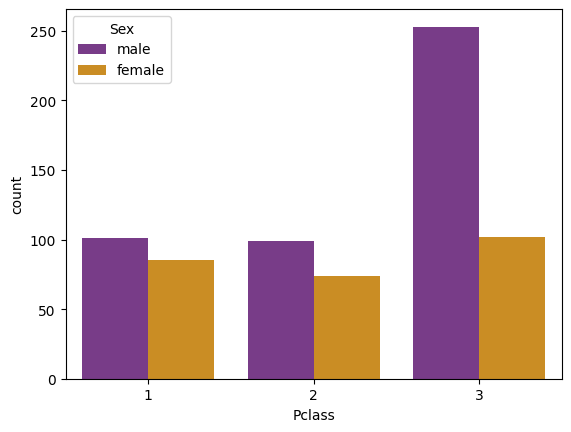

In [12]:
# Alumno: Determinar cuantas personas había de cada clase
# diferenciando por género
# Utilice el gráfico de seaborn countplot con hue="Sex"
sns.countplot(data=df2, x='Pclass', hue='Sex', palette='CMRmap')

#### Transformar variables categóricas texto a clases numeradas

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
# Alumno, cree un dataset df_cod como copia del que viene trabajando
df_cod = df2.copy()

In [15]:
# Utiliza el LabelEncoder para codificar la columna Sex, remplazando
# esa columna por la nueva en el dataset nuevo que acaba de generar
# Recuerde conservar el encoder!
def enc_sex(df):
  le = LabelEncoder()
  sex_le = le.fit_transform(df['Sex'])
  df['Sex_Cod'] = sex_le
  df.drop(columns='Sex', inplace=True, axis=1)
  return le
sex_le = enc_sex(df_cod)
df_cod

,Survived,Pclass,Age,SibSp,Parch,Sex_Cod
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
885,0,3,39.0,0,5,0
886,0,2,27.0,0,0,1
887,1,1,19.0,0,0,0
889,1,1,26.0,0,0,1


In [16]:
# Alumno,  imprimir las clases que ha detectado su encoder
# (debe llamar al atributo classes_)
sex_le.classes_

array(['female', 'male'], dtype=object)

<Axes: xlabel='Age', ylabel='Count'>

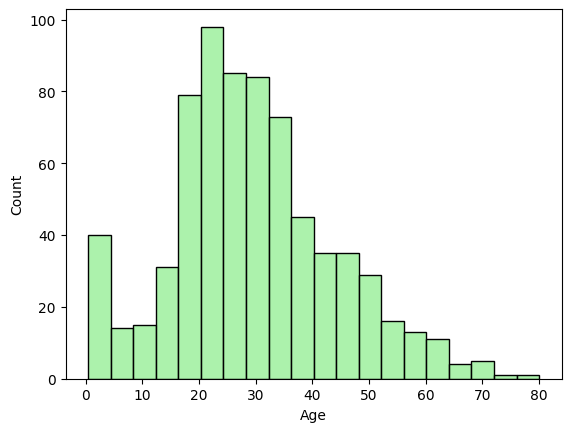

In [17]:
# Alumno: Analizar la distribución de la edad
sns.histplot(data=df_cod, x='Age', color='LightGreen')

In [18]:
# Alumno: utilizar StandarScaler para normalizar la column de "Age"
# Conservar el scaler que lo necesitará para el final
def scaler_age(df):
  scaler_age = StandardScaler()
  df.loc[:, 'Age'] = scaler_age.fit_transform(df[['Age']])
  return scaler_age

scaler_age = scaler_age(df_cod)
df_cod

,Survived,Pclass,Age,SibSp,Parch,Sex_Cod
0,0,3,-0.530377,1,0,1
1,1,1,0.571831,1,0,0
2,1,3,-0.254825,0,0,0
3,1,1,0.365167,1,0,0
4,0,3,0.365167,0,0,1
...,...,...,...,...,...,...
885,0,3,0.640719,0,5,0
886,0,2,-0.185937,0,0,1
887,1,1,-0.737041,0,0,0
889,1,1,-0.254825,0,0,1


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [19]:
# Alumno: genere un numpy array "X" que posea todos los feutres (todo menos Survived)
# genere un array numpy "y" de solo la columna Survived
X = df_cod[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_Cod']].values
y = df_cod['Survived'].values

In [20]:
# Alumno: obtener la cantidad de features (cantidad de columnas)
# y almacenar en in_shape
in_shape = X.shape[1]

In [21]:
# Alumno: crear una variable out_shape indicando cuandas neuronas de salida desea
out_shape = 1

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 80%20%

In [22]:
# Alumno, generar los dataset de train y test superando en 80%20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from keras.layers import Dense
# Alumno: crear un modelo secuencial de dos capas (hidden y output).
# Coloque correctamente el valor de in_shape y out_shape en el modelo
# pero seleccione por su cuenta la cantidad de neuronas en la capa oculta
model = Sequential()
model.add(Dense(units=64, activation='sigmoid', input_shape=(in_shape,)))
model.add(Dense(units=out_shape, activation='sigmoid'))

In [24]:
# Alumno: compilar el modelo con binary_crossentropy y métrica de "accuracy"
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [25]:
# Alumno: entrenar el modelo, seleccionar un 20% para el dataset de validacion
# Queda a su gusto seleccionar la cantidad de épocas
# Almacenar la salida del fit en una variable "history"
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
15/15 [==============================] - 5s 16ms/step - loss: 0.6642 - accuracy: 0.5724 - val_loss: 0.6686 - val_accuracy: 0.5478
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6191 - accuracy: 0.6206 - val_loss: 0.6305 - val_accuracy: 0.6348
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5868 - accuracy: 0.7018 - val_loss: 0.6194 - val_accuracy: 0.6435
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5567 - accuracy: 0.7544 - val_loss: 0.5833 - val_accuracy: 0.7130
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5347 - accuracy: 0.7522 - val_loss: 0.5523 - val_accuracy: 0.7478
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5162 - accuracy: 0.8026 - val_loss: 0.5545 - val_accuracy: 0.7217
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5006 - accuracy: 0.7807 - val_loss: 0.5169 - val_accuracy: 0.7739
Epoch 8/50
15/15 [=

<Axes: >

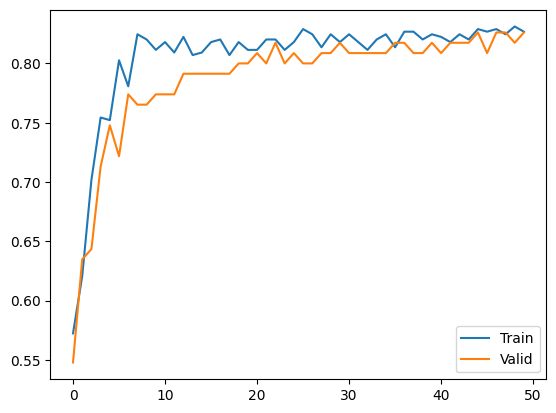

In [26]:
# Alumno: Graficar la evolución del accuracy durante el entrenamiento
# tanto para el dataset de train y el de valid en un gráfico
# plot line
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='Train')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='Valid')

In [27]:
# Alumno: obtener la probabilidad de sobreviir (y_hat_prob)
# realizando una prediccion (predict) con el dataset de test
y_hat_prob = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [28]:
# Alumno: transformar las probabilidads en 0 y 1, si la probabilidad es
# mayor o igual a 0.5 definir que la persona sobrevivió (1)
# Estos valores guardarlos en y_hat
y_hat = [1 if x >= 0.5 else 0 for x in y_hat_prob]

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [29]:
# Alumno, calcular la exactitud (accuracy) de su modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.7482517482517482

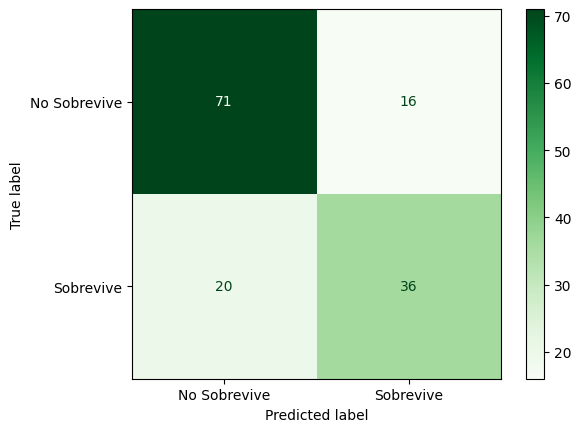

In [30]:
# Alumno, dibujar la matriz de confusion
# definir display_labels=['NO SOBREVIVE', 'SOBREVIVE']
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Sobrevive', 'Sobrevive'])
cmd.plot(cmap=plt.cm.Greens)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [41]:
# Alumno, pona a prueba el modelo, ingrese datos ficticios y divertase un rato :)
# Recordar que los datos de genero (Sex) ahora son numéricos para el modelo (0 o 1)
# Debe utilizar el encoder que se generó antes para convertir los nuevos valores
# Recordar que los datos de edad (Age) se normalizaron, debe utilizar ese
# scaler generado para transformarlo
X_prueba = pd.DataFrame({'Pclass':[1], 'Age':[28], 'SibSp':[0], 'Parch':[0], 'Sex':['male']})
X_prueba['Sex'] = sex_le.transform(X_prueba['Sex'])
X_prueba['Age'] = scaler_age.transform(X_prueba[['Age']])

prediccion = [1 if x >= 0.5 else 0 for x in model.predict(X_prueba)]
prediccion


1/1 [==============================] - 0s 47ms/step


[1]